In [1]:
# This notebook was built in Catherine's vectorenv
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
import pylab
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('ggplot')

/Users/ckuhn/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [3]:
%cd /Users/ckuhn/Downloads
NDCI_raw = pd.read_csv('S2_NDCI.csv', low_memory=False)

/Users/ckuhn/Downloads


In [4]:
NDCI_raw.head(2)

,system:time_start,Lake_1-46-3,Abraham Lake,Greenpepper Lake,Sands of Time,Boot Lake,Canvasback Lake,YF04,Scoter Lake,YF03,...,West Crazy Lake,YF20,YF08,YF14,Thumb Lake,Buddy Lake,Twelvemile Lake,Twin Lake,Shack Lake,YF02
0,"May 3, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.440,...,NaN,-0.423,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"May 10, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.497,...,NaN,NaN,-0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = pd.melt(NDCI_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Chla Index')

In [8]:
df.head(2)

,system:time_start,Lake,Chla Index
0,"May 3, 2016",Lake_1-46-3,NaN
1,"May 10, 2016",Lake_1-46-3,NaN


In [9]:
df.tail(2)

,system:time_start,Lake,Chla Index
646,"Sep 20, 2016",YF02,NaN
647,"Sep 27, 2016",YF02,NaN


### Resample the dataframe to every month

In [10]:
df2 = df.set_index(pd.DatetimeIndex(df['system:time_start']))
df2 = df2.resample("M").median()

df2 = df2.reset_index()
df2
# unset the index

#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.resample.html

,system:time_start,Chla Index
0,2016-05-31,-0.301
1,2016-06-30,-0.242
2,2016-07-31,-0.022
3,2016-08-31,-0.004
4,2016-09-30,-0.287


In [11]:
#remelt that shit
df3 = pd.melt(df2, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')

#### Change the shape of the dataframe for plotting

/Users/ckuhn/Documents/ABOVE/Figures


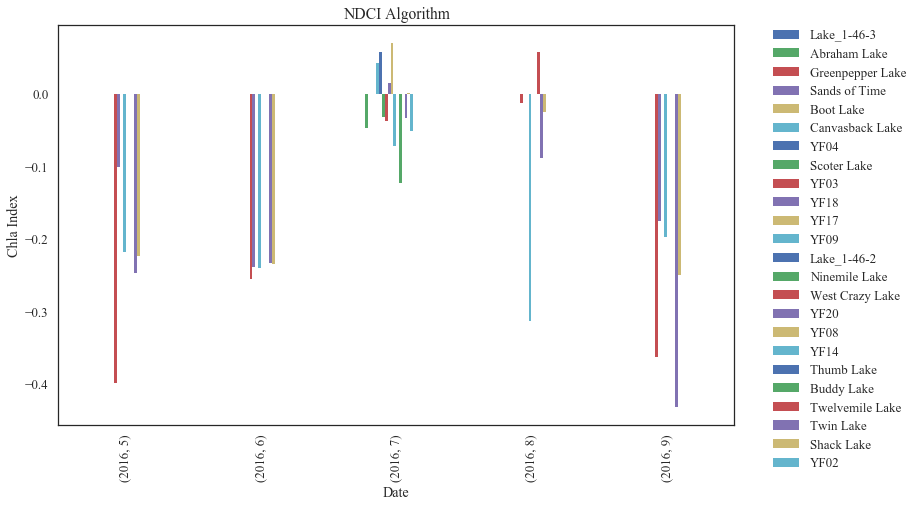

In [14]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

NDCI_raw = NDCI_raw.set_index(pd.DatetimeIndex(NDCI_raw['system:time_start']))
NDCI  = NDCI_raw.groupby([(NDCI_raw.index.year),(NDCI_raw.index.month)]).mean()
NDCI.plot(kind = 'bar')

plt.ylabel('Chla Index')
plt.xlabel('Date')
plt.title('NDCI Algorithm')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
#plt.savefig('L8_nirSWIR_bar.png', dpi = 300)

### Monthly Averages Per Algorithms

In [15]:
# Melt them all 
df1 = pd.melt(NDCI_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')

In [16]:
# Add column with categorical
df1['Algorithm'] = 'NDCI'

In [17]:
df3.head(1)

,system:time_start,Lake,Reflectance
0,2016-05-31,Chla Index,-0.301


In [18]:
df1['Reflectance'].min()

-0.49700000000000005

In [19]:
# Concatenate
boss = df1

In [20]:
print(boss.shape)
boss.head(1)

(648, 4)


,system:time_start,Lake,Reflectance,Algorithm
0,"May 3, 2016",Lake_1-46-3,NaN,NDCI


In [21]:
# Now resample to the month

boss0 = boss.set_index(pd.DatetimeIndex(boss['system:time_start']))
boss1 = boss0.resample("M").median()

boss2 = boss1.reset_index()
boss.head(1)

,system:time_start,Lake,Reflectance,Algorithm
0,"May 3, 2016",Lake_1-46-3,NaN,NDCI


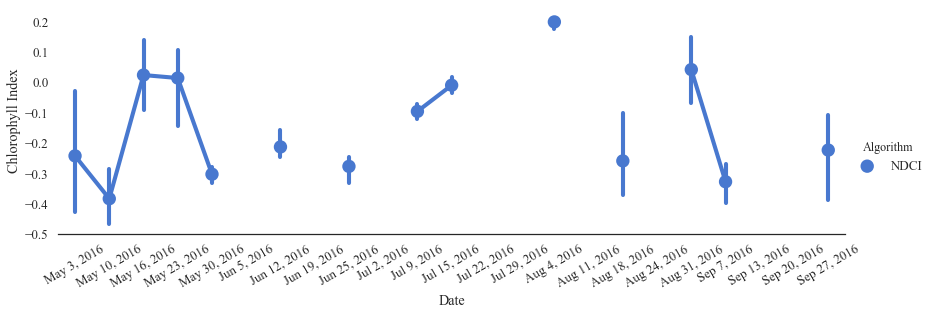

In [22]:
g = sns.factorplot(x="system:time_start", y="Reflectance", hue="Algorithm", data=boss,
                   palette="muted", size=4, aspect=3)

g.despine(left=True)
g.set_ylabels("Chlorophyll Index")
g.set_xlabels("Date")
g.set_xticklabels(rotation=30)

#plt.tight_layout()

In [23]:
#boss.groupby(['system:time_start', 'Algorithm']).mean()#.plot(kind = 'bar')
bossx = boss0.dropna()
grouper = bossx.groupby([pd.TimeGrouper('1M'), 'Algorithm'])
grouper['Algorithm'].count()

system:time_start  Algorithm
2016-05-31         NDCI         25
2016-06-30         NDCI          9
2016-07-31         NDCI         15
2016-08-31         NDCI         10
2016-09-30         NDCI          7
Name: Algorithm, dtype: int64

In [24]:
result = grouper['Reflectance'].mean().unstack('Algorithm')
result
#https://stackoverflow.com/questions/32012012/pandas-resample-timeseries-with-groupby

Algorithm,NDCI
system:time_start,
2016-05-31,-0.241960
2016-06-30,-0.240444
2016-07-31,-0.020467
2016-08-31,-0.060700
2016-09-30,-0.281857


In [25]:
stderr = grouper['Reflectance'].std().unstack('Algorithm')
stderr

Algorithm,NDCI
system:time_start,
2016-05-31,0.217888
2016-06-30,0.063779
2016-07-31,0.057072
2016-08-31,0.253806
2016-09-30,0.115329


In [26]:
stderr = grouper['Reflectance'].min().unstack('Algorithm')
stderr

Algorithm,NDCI
system:time_start,
2016-05-31,-0.497
2016-06-30,-0.359
2016-07-31,-0.122
2016-08-31,-0.407
2016-09-30,-0.431


/Users/ckuhn/Documents/ABOVE/Figures


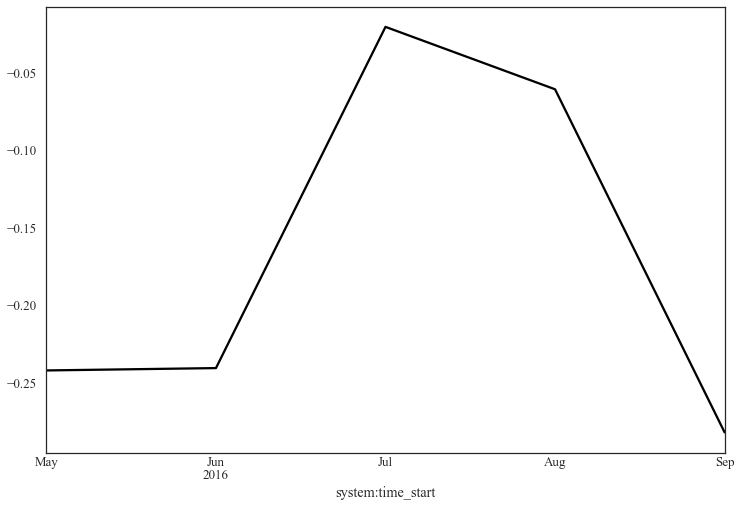

In [37]:
fig, ax = plt.subplots()

result['NDCI'].plot(color ='black', ax=ax) #no need to specify for first axis
#ax.set_xlabel('')
#ax.set_title('NDCI')
#ax.set_xticklabels([])

plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('overall_alg_bar_S2.png', dpi = 300)

/Users/ckuhn/Documents/ABOVE/Figures


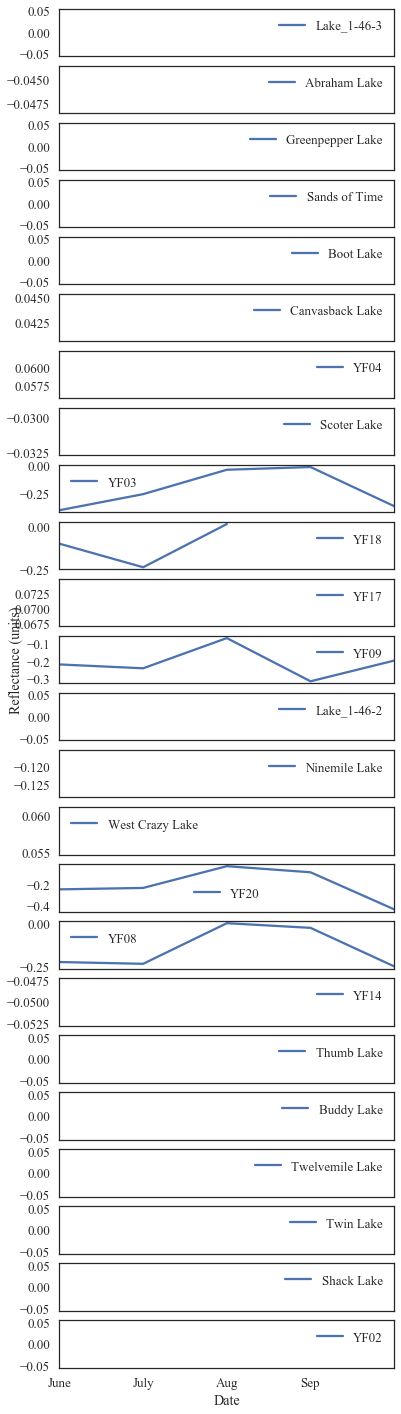

In [49]:
data = NDCI

#NDCI_raw = pd.read_csv('NDCI.csv', low_memory=False)
#rgb_raw = pd.read_csv('rgb.csv', low_memory=False)
#blueGreen_raw = pd.read_csv('blueGreen.csv', low_memory=False)
#nirSWIR_raw = pd.read_csv('nirSWIR.csv', low_memory=False)

fig, ax = plt.subplots(len(data.columns))
for idx in range(len(data.columns)):
    data[data.columns[idx]].plot(ax=ax[idx])

ax[idx//2].set_ylabel("Reflectance (units)")

# Retrieve an element of a plot and set properties
for idx in range(len(data.columns)):
    ax[idx].set_xticklabels('')
    ax[idx].legend()
    
ax[idx].set_xlabel("Date")
ax[idx].set_xlabel("Date")
ax[idx].set_xlabel("Date")

ax[idx].set_xticklabels(['June','', 'July','', 'Aug','', 'Sep'])

fig.set_size_inches([6, 25])

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('indv_TS_rgb_S2.png', dpi = 300)

### Chla Index By Lake for Matt

/Users/ckuhn/Documents/ABOVE/Figures


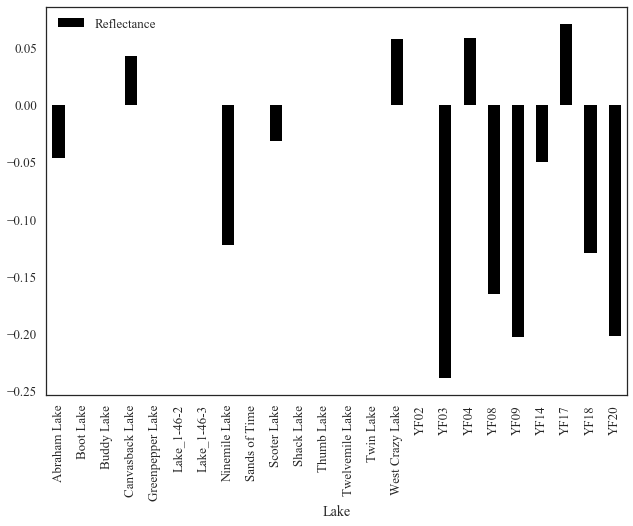

In [46]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

df1.groupby(['Lake']).mean().plot(kind = 'bar',color ='black')
#ax[1].set_xlabel('')
#ax[1].set_title('NDCI')
#ax[1].set_xticklabels([])

fig.set_size_inches([8, 10])


#plt.tight_layout()
%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('RGB_NCDI_S2_bar.png', dpi = 300)

In [48]:
g2 = df1.groupby(['Lake']).mean()

g1 = g1.reset_index()

g2

g1['NDCI Chla Index'] = g1['Reflectance']

concat = pd.concat([g1,g2])
concat = concat.drop('Reflectance')
print(concat)

#concat.to_csv('s2_alg_results_for_matt.csv')

NameError: name 'g1' is not defined